## Data Understanding Python Notebook.



In [1]:
# Read data from sqllite database which has all the csv files dumped earlier.
import sqlite3
import pandas as pd
conn = sqlite3.connect("C:\Users\Amandeep\pluralsight.db")

user_assessment_scores = pd.read_sql_query("select * from user_assessment_scores;", conn)
user_course_views = pd.read_sql_query("select * from user_course_views;", conn)
course_tags = pd.read_sql_query("select * from course_tags;", conn)
user_interests = pd.read_sql_query("select * from user_interests;", conn)

# Close connection of sqlite
conn.close()

In [2]:
from IPython.display import display, HTML

print("User Assessments : Dims = " + str(user_assessment_scores.shape))
display(user_assessment_scores.head(4))
display(user_assessment_scores.tail(4))

print("\nUser Course Views : Dims = " + str(user_course_views.shape))
display(user_course_views.head(4))
display(user_course_views.tail(4))

print("\nCourse Tags : Dims = " + str(course_tags.shape))
display(course_tags.head(4))
display(course_tags.tail(4))

print("\nUser Interests : Dims = " + str(user_interests.shape))
display(user_interests.head(4))
display(user_interests.tail(4))

User Assessments : Dims = (6571, 4)


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
6567,8887,angular-js,2016-09-30 22:30:48,221
6568,8887,docker,2017-03-24 17:55:06,148
6569,8887,html5,2017-02-10 16:38:53,241
6570,4440,c-sharp,2017-09-04 15:58:48,126



User Course Views : Dims = (249238, 6)


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
249234,9999,2017-10-14,python-getting-started,104,Beginner,1612
249235,10000,2017-08-18,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,402
249236,10000,2017-08-21,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,9500
249237,10000,2017-08-21,apex-fundamental-coding,229,Beginner,1659



Course Tags : Dims = (11337, 2)


,course_id,course_tags
0,12-principles-animation-toon-boom-harmony-1475,2d-animation
1,2d-racing-game-series-unity-5-1312,game-design
2,2d-racing-games-unity-volume-2-1286,game-art
3,2d-racing-games-unity-volume-2-1286,digital-painting


,course_id,course_tags
11333,z-os-mainframe-introduction,mainframe
11334,z-os-tso-ispf-environment-introduction,mainframe
11335,zsphere-modeling-zbrush-3505,3d-modeling
11336,zsphere-modeling-zbrush-3505,3d-sculpting



User Interests : Dims = (297526, 3)


,user_handle,interest_tag,date_followed
0,1,mvc-scaffolding,2017-06-27 16:26:52
1,1,mvc2,2017-06-27 16:26:52
2,1,mvc-html-helpers,2017-06-27 16:26:52
3,1,mvc4-ioc,2017-06-27 16:26:52


,user_handle,interest_tag,date_followed
297522,10000,salesforce,2017-08-14 14:56:57
297523,10000,sql,2017-08-14 14:56:57
297524,10000,java,2017-08-14 14:56:57
297525,10000,c#,2017-08-14 14:56:57


In [36]:
# Lets update the datatypes.
user_assessment_scores['user_assessment_score'] = pd.to_numeric(user_assessment_scores['user_assessment_score'])
user_assessment_scores['user_assessment_date'] = pd.to_datetime(user_assessment_scores['user_assessment_score'])

user_course_views['view_time_seconds'] = pd.to_numeric(user_course_views['view_time_seconds'])
user_course_views['view_date'] = pd.to_datetime(user_course_views['view_date'])

user_interests['date_followed'] = pd.to_datetime(user_interests['date_followed'])

user_handle              object
interest_tag             object
date_followed    datetime64[ns]
dtype: object

In [3]:
print(user_assessment_scores.isna().sum() + user_assessment_scores.isnull().sum())
print(user_course_views.isnull().sum() + user_course_views.isna().sum())
print(course_tags.isnull().sum() + course_tags.isna().sum())
print(user_interests.isnull().sum() + user_interests.isna().sum())

user_handle              0
assessment_tag           0
user_assessment_date     0
user_assessment_score    0
dtype: int64
user_handle          0
view_date            0
course_id            0
author_handle        0
level                0
view_time_seconds    0
dtype: int64
course_id      0
course_tags    0
dtype: int64
user_handle      0
interest_tag     0
date_followed    0
dtype: int64


There is no missing data, hence we don't have to deal with any missing data cases for now.
<br><br>- Lets get rid of duplicate rows from the data. <br>- Next lets see if when we have all the data for users in interest and course view table

In [4]:
# We have some rows which are duplicate. Lets get rid of those rows, 
# so that we can train our model only once on one training set.

if(user_assessment_scores.drop_duplicates().shape[0] != user_assessment_scores.shape[0]):
    user_assessment_scores = user_assessment_scores.drop_duplicates()
    print("Duplicates in user assessment scores df removed")
    
if(user_course_views.drop_duplicates().shape[0] != user_course_views.shape[0]):
    user_course_views = user_course_views.drop_duplicates()
    print("Duplicates in user course views df removed")

if(course_tags.drop_duplicates().shape[0] != course_tags.shape[0]):
    course_tags = course_tags.drop_duplicates()
    print("Duplicates in course tags df removed")

if(user_interests.drop_duplicates().shape[0] != user_interests.shape[0]):
    user_interests = user_interests.drop_duplicates()
    print("Duplicates in user interest df removed")

Duplicates in user interest df removed


Next let us collect all user ids. We will use this all users df to find users who have missing interests, course views, or assessments!<br> Similarly, we will also find the courses with missing tags but has user course view!

In [5]:
unique_users_in_assessment = user_assessment_scores['user_handle'].drop_duplicates()
unique_users_in_course_view = user_course_views['user_handle'].drop_duplicates()
unique_users_interests = user_interests['user_handle'].drop_duplicates()

unique_users = pd.concat([unique_users_in_assessment, unique_users_interests, unique_users_in_course_view]).drop_duplicates()
print(unique_users.head())
print(unique_users.shape[0])

0    7487
6    7407
7    3600
8    8152
9    3637
Name: user_handle, dtype: object
10000


In [6]:
unique_courses_in_course_view = user_course_views['course_id'].drop_duplicates()
unique_courses_in_course_tags = course_tags['course_id'].drop_duplicates()
unique_courses = pd.concat([unique_courses_in_course_view, unique_courses_in_course_tags]).drop_duplicates()
print(unique_courses.head())
print(unique_courses.shape[0])

0           cpt-sp2010-web-designers-branding-intro
2                      cpt-sp2010-web-designers-css
4    aws-certified-solutions-architect-professional
5              aws-certified-sysops-admin-associate
6                     aws-system-admin-fundamentals
Name: course_id, dtype: object
5942


We have found that there are 10000 users and 5942 courses in the system. Lets also grab unique course tags, interest tags, and assessment tags.

In [7]:
unqiue_course_tags = course_tags['course_tags'].drop_duplicates()
print(unqiue_course_tags.head())
print(unqiue_course_tags.shape[0])

unqiue_assessment_tags = user_assessment_scores['assessment_tag'].drop_duplicates()
print(unqiue_assessment_tags.head())
print(unqiue_assessment_tags.shape[0])

unique_interest_tags = user_interests['interest_tag'].drop_duplicates()
print(unique_interest_tags.head())
print(unique_interest_tags.shape[0])

all_tags = pd.concat([unqiue_course_tags, unqiue_assessment_tags, unique_interest_tags]).drop_duplicates()
print("Total number of tags : " + str(all_tags.shape[0]))

0        2d-animation
1         game-design
2            game-art
3    digital-painting
4       image-editing
Name: course_tags, dtype: object
999
0    angular-js
1           css
2         html5
3          java
4    javascript
Name: assessment_tag, dtype: object
54
0     mvc-scaffolding
1                mvc2
2    mvc-html-helpers
3            mvc4-ioc
4         mvc-testing
Name: interest_tag, dtype: object
748
Total number of tags : 1191


Results show that we have 999 unique course tags, 54 assessment tags, and 748 interest tags! The total tags are 1191 which means we have some tags common.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor']=True
user_assessment_scores.dtypes

user_handle              object
assessment_tag           object
user_assessment_date     object
user_assessment_score    object
dtype: object

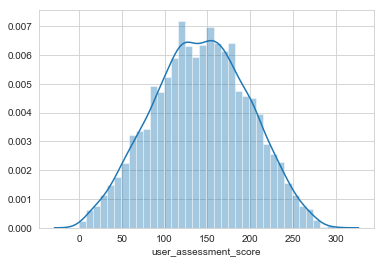

In [22]:
# Plot the assessment scores
sns.distplot(user_assessment_scores['user_assessment_score'].dropna())

In [ ]:
# pick up tomorrow ......